<a href="https://colab.research.google.com/github/meriemdouider1/final-dl-code/blob/main/resnet%20v2%20(adma%20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import math
import os
import cv2
import numpy as np
from keras import layers
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical# convert to one-hot-encoding
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools
%matplotlib inline
from glob import glob
from keras import Model
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tqdm import tqdm_notebook
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import load_model, Model


In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"meryemdouider","key":"71abdf1b37f401d9b4f539d2b43177eb"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download "sshikamaru/glaucoma-detection"

kaggle.json
 98% 184M/188M [00:01<00:00, 197MB/s]
100% 188M/188M [00:01<00:00, 177MB/s]


In [6]:
!unzip glaucoma-detection.zip

Archive:  glaucoma-detection.zip
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/001.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/002.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/003.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/004.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/005.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/006.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/007.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/008.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/009.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/010.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glauc

In [7]:
DATAGlua_Train = '/content/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train'
DATAGlua_Test = '/content/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation'

In [8]:
CATEGORIES  = list()
for root, dirs, files in os.walk(DATAGlua_Train, topdown=False):
    for name in dirs:
        CATEGORIES.append(os.path.join(name))
print (CATEGORIES)

['Glaucoma_Positive', 'Glaucoma_Negative']


In [9]:
x_train_data = []
y_train_data = []
IMG_SIZE=224
def creation_train_data():
    for category in CATEGORIES:
      path = os.path.join(DATAGlua_Train, category)
      class_num = CATEGORIES.index(category)
      for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
            new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
            x_train_data.append(new_array)
            y_train_data.append(class_num)
        except Exception as e:
            pass
creation_train_data()

In [10]:
x_test_data = []
y_test_data = []
IMG_SIZE=224
def creation_test_data():
    for category in CATEGORIES:
      path = os.path.join(DATAGlua_Test, category)
      class_num = CATEGORIES.index(category)
      for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
            new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
            x_test_data.append(new_array)
            y_test_data.append(class_num)
        except Exception as e:
            pass
creation_test_data ()

In [11]:
X_Train, X_Val, Y_Train, Y_Val = train_test_split(x_train_data, y_train_data, test_size=0.05, random_state=1)

In [12]:
X_Train = np. squeeze(np.array(X_Train))
X_Val = np. squeeze(np.array(X_Val))
Y_Train = np. squeeze(np.array(Y_Train))
Y_Val = np. squeeze(np.array(Y_Val))
x_test_data = np. squeeze(np.array(x_test_data))

In [13]:
Y_Train = to_categorical(Y_Train)
Y_Val = to_categorical(Y_Val)

# **modèle 3 :**

In [14]:
####resnet_v2

In [15]:
IMG_SHAPE = (224, 224,3)

In [16]:
from tensorflow.keras.applications import inception_resnet_v2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten

In [17]:
base_model3 = inception_resnet_v2.InceptionResNetV2

base_model3 = base_model3(weights='imagenet', include_top=False)

219062272/219055592 [==============================] - 1s 0us/step


In [18]:
for layer in base_model3.layers:
    print(layer.name)
    layer.trainable = False
    
print(len(base_model3.layers))

input_1
conv2d
batch_normalization
activation
conv2d_1
batch_normalization_1
activation_1
conv2d_2
batch_normalization_2
activation_2
max_pooling2d
conv2d_3
batch_normalization_3
activation_3
conv2d_4
batch_normalization_4
activation_4
max_pooling2d_1
conv2d_8
batch_normalization_8
activation_8
conv2d_6
conv2d_9
batch_normalization_6
batch_normalization_9
activation_6
activation_9
average_pooling2d
conv2d_5
conv2d_7
conv2d_10
conv2d_11
batch_normalization_5
batch_normalization_7
batch_normalization_10
batch_normalization_11
activation_5
activation_7
activation_10
activation_11
mixed_5b
conv2d_15
batch_normalization_15
activation_15
conv2d_13
conv2d_16
batch_normalization_13
batch_normalization_16
activation_13
activation_16
conv2d_12
conv2d_14
conv2d_17
batch_normalization_12
batch_normalization_14
batch_normalization_17
activation_12
activation_14
activation_17
block35_1_mixed
block35_1_conv
block35_1
block35_1_ac
conv2d_21
batch_normalization_21
activation_21
conv2d_19
conv2d_22
batc

In [19]:
base_model3.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
________________________________________________________________________________

In [20]:
base_model3.trainable = False

In [21]:
x = base_model3.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(2, activation='sigmoid')(x)


model3 = Model(base_model3.input, x)
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
model3.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [22]:

model3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [23]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=60, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, fill_mode='nearest')

In [24]:
train_datagen.fit(X_Train)

In [25]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen.fit(X_Val)

In [26]:
train_model  = model3.fit(X_Train, Y_Train, batch_size=64, epochs=10,
                    validation_data=(X_Val, Y_Val))

Epoch 1/10
8/8 [==============================] - 22s 869ms/step - loss: 610.4838 - accuracy: 0.6073 - val_loss: 540.0250 - val_accuracy: 0.1538
Epoch 2/10
8/8 [==============================] - 2s 298ms/step - loss: 331.0147 - accuracy: 0.4962 - val_loss: 224.5062 - val_accuracy: 0.8462
Epoch 3/10
8/8 [==============================] - 2s 297ms/step - loss: 240.7416 - accuracy: 0.6076 - val_loss: 173.1415 - val_accuracy: 0.8462
Epoch 4/10
8/8 [==============================] - 2s 298ms/step - loss: 253.3324 - accuracy: 0.6907 - val_loss: 205.1589 - val_accuracy: 0.1538
Epoch 5/10
8/8 [==============================] - 2s 299ms/step - loss: 199.0155 - accuracy: 0.5908 - val_loss: 88.5092 - val_accuracy: 0.8462
Epoch 6/10
8/8 [==============================] - 2s 301ms/step - loss: 185.0074 - accuracy: 0.5609 - val_loss: 137.6231 - val_accuracy: 0.8462
Epoch 7/10
8/8 [==============================] - 2s 302ms/step - loss: 168.1465 - accuracy: 0.6565 - val_loss: 67.6029 - val_accuracy: 

In [27]:
for layer in model3.layers[:780]:
    layer.trainable = False

for layer in model3.layers[780:]:
    layer.trainable = True

In [28]:
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
model3.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

In [29]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [30]:

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, 
                                            min_lr=0.000001, cooldown=3)

In [31]:
train_model  = model3.fit(X_Train, Y_Train, batch_size=64, epochs=20,
                    validation_data=(X_Val, Y_Val))

Epoch 1/20
8/8 [==============================] - 13s 682ms/step - loss: 490.6603 - acc: 0.5538 - val_loss: 199.8022 - val_acc: 0.8462
Epoch 2/20
8/8 [==============================] - 2s 304ms/step - loss: 249.4450 - acc: 0.6211 - val_loss: 230.6882 - val_acc: 0.8462
Epoch 3/20
8/8 [==============================] - 2s 306ms/step - loss: 333.3937 - acc: 0.7347 - val_loss: 415.7010 - val_acc: 0.1538
Epoch 4/20
8/8 [==============================] - 2s 307ms/step - loss: 235.3728 - acc: 0.4995 - val_loss: 71.8596 - val_acc: 0.8462
Epoch 5/20
8/8 [==============================] - 2s 306ms/step - loss: 158.7006 - acc: 0.5673 - val_loss: 203.0309 - val_acc: 0.8462
Epoch 6/20
8/8 [==============================] - 2s 308ms/step - loss: 259.5313 - acc: 0.7213 - val_loss: 228.7009 - val_acc: 0.1538
Epoch 7/20
8/8 [==============================] - 3s 338ms/step - loss: 159.5649 - acc: 0.5735 - val_loss: 195.5311 - val_acc: 0.1538
Epoch 8/20
8/8 [==============================] - 2s 311ms/ste

In [32]:
loss_val, acc_val = model3.evaluate(X_Val, Y_Val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (acc_val, loss_val))

1/1 [==============================] - 0s 146ms/step - loss: 30.1649 - acc: 0.8462
Validation: accuracy = 0.846154  ;  loss_v = 30.164944


In [33]:
y_test_data = to_categorical(y_test_data)
loss_test, acc_test = model3.evaluate(x_test_data, y_test_data, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (acc_test, loss_test))

5/5 [==============================] - 2s 203ms/step - loss: 44.2780 - acc: 0.7385
Test: accuracy = 0.738462  ;  loss = 44.278023


In [34]:
model3.save("Incep_ResNet_v2.h5")

Text(0.5, 1.0, 'Training and validation accuracy')

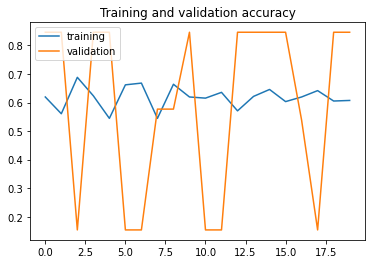

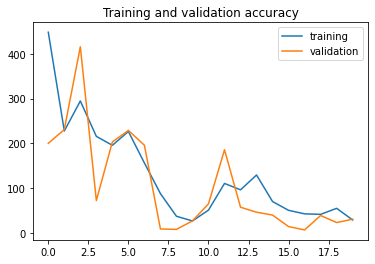

In [36]:

acc = train_model.history['acc']
val_acc = train_model .history['val_acc']


loss = train_model.history['loss']
val_loss = train_model .history['val_loss']


epochs = range(len(acc))


plt.plot(epochs, acc, label = "training")
plt.plot(epochs, val_acc, label = "validation")
plt.legend(loc="upper left")
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, label = "training")
plt.plot(epochs, val_loss, label = "validation")
plt.legend(loc="upper right")
plt.title('Training and validation accuracy')